<a href="https://colab.research.google.com/github/Jesica3018/APMKelompok6/blob/main/SVM_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(kernel='linear')

In [ ]:
data1 = pd.read_csv("heart_disease.csv")
data1.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,result
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
x = data1.loc[:,'age':'oldpeak']
y = data1['result']

In [ ]:
print(x[0:5])

   age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0   70    1      4                     130                322   
1   67    0      3                     115                564   
2   57    1      2                     124                261   
3   64    1      4                     128                263   
4   74    0      2                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     2   
1                    0                                     2   
2                    0                                     0   
3                    0                                     0   
4                    0                                     2   

   maximum_heart_rate_achieved  exercise_induced_angina  oldpeak  
0                          109                        0      2.4  
1                          160                        0      1.6  
2                      

In [ ]:
print(y[0:5])

0    1
1    0
2    1
3    0
4    0
Name: result, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
print('Training Data', x_train.shape)

Training Data (216, 10)


In [ ]:
#scalling feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [ ]:
print(x_train[0:5])

[[-0.91920495  0.68511879  0.89802651  0.57484919  1.25479805 -0.41702883
  -0.93282933 -1.27031552  1.50755672  0.66737459]
 [-0.48663791 -1.4596009   0.89802651 -1.18389621  0.1500302  -0.41702883
   1.08208202  0.4001712  -0.66332496 -0.97176148]
 [-1.13548847  0.68511879 -1.25723711 -0.01139928 -0.52833602 -0.41702883
   1.08208202  1.64232799 -0.66332496 -0.97176148]
 [ 0.37849616  0.68511879  0.89802651 -0.30452351  1.04159724 -0.41702883
   1.08208202  0.91416711 -0.66332496 -0.97176148]
 [ 0.59477967  0.68511879  0.89802651 -0.30452351  0.22755777 -0.41702883
   1.08208202 -0.37082267  1.50755672  1.57800574]]


In [ ]:
print(x_test[0:5])

[[ 0.81106319 -1.4596009   0.89802651  0.57484919  2.86349509 -0.41702883
   1.08208202  0.31450521 -0.66332496  0.1209959 ]
 [ 0.2703544   0.68511879 -1.25723711 -0.36314836  0.28570345 -0.41702883
  -0.93282933 -0.37082267 -0.66332496 -0.69857214]
 [ 0.16221264  0.68511879  0.89802651 -0.01139928  0.71210507  2.39791576
   1.08208202 -1.99847639  1.50755672  0.48524836]
 [-0.16221264  0.68511879  0.89802651  0.57484919 -0.83844629  2.39791576
   1.08208202  0.22883923  1.50755672  1.85119508]
 [-1.35177198 -1.4596009   0.89802651 -1.65289499  0.36323101 -0.41702883
   1.08208202 -1.18464953 -0.66332496 -0.42538279]]


In [ ]:
#Training the Kernel SVM model on the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the Test set results
y_predict = classifier.predict(x_test)

In [ ]:
y_predict[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [ ]:
#making the confusion matrix

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy:')
print((y_test==y_pred).sum()/len(y_pred))

Accuracy:
0.7592592592592593


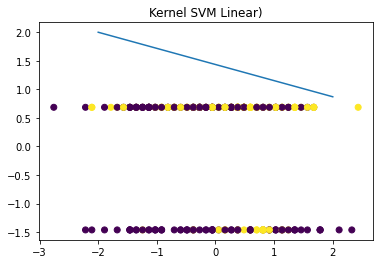

In [ ]:
#Visualisasi

plt.scatter(x_test[:,0],x_test[:,1],c = y_pred)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.title('Kernel SVM Linear)')
plt.plot(xx, yy)
plt.show()